In [42]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [43]:
def gaus_func(mu,sigma,x):
    return math.e**(-(x-mu)**2/(2*sigma**2)) / (sigma*(2*math.pi)**0.5)

def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    for i in X:
        P1_x = gaus_func(mu_1,sigma_1,i)
        P2_x = gaus_func(mu_2,sigma_2,i)
        P_x = w1*P1_x + w2*P2_x
        P_x_1 = (w1*P1_x)/P_x
        P_x_2 = (w2*P2_x)/P_x
        proba_temp = []
        proba_temp.append(P_x_1)
        proba_temp.append(P_x_2)
        proba_X.append(proba_temp)
    return proba_X

def pred_x(proba_X, limit_proba):
    pred_X = []
    for x in proba_X:
        if x[0] >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

def graph(X, pred_X, mu_1, sigma_1, mu_2, sigma_2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    for i in range(X.shape[0]):
        if pred_X[i] == y[i]:
            true_pred.append([X[i], -0.025])
        else:
            if y[i] == 1:
                false_pred_1.append([X[i], -0.0075])
            else:
                false_pred_2.append([X[i], -0.015])

    false_pred_1 = np.array(false_pred_1)            
    false_pred_2 = np.array(false_pred_2)
    true_pred = np.array(true_pred)

    x_theory = np.linspace(42, 85, 20000)
    y_theory_1 = []
    for x in x_theory:
        y_theory_1.append(gaus_func(mu_1,sigma_1,x))
    y_theory_2 = []
    for x in x_theory:
        y_theory_2.append(gaus_func(mu_2,sigma_2,x))

    plt.figure(figsize=(10, 8))    
    plt.hist(
        X[:N1], bins = 'auto', color='#539caf', alpha = 0.35, label = 'Вироблені на завод 1')
    plt.hist(
        X[N1:N], bins = 'auto', color='sandybrown', alpha = 0.75, label = 'Вироблені на завод 2')
    plt.plot(mu_1, 0, 'o', markersize = 11, color = 'blue', label = 'Mu 1')
    plt.plot(mu_2, 0, 'o', markersize = 11, color = 'red', label = 'Mu 2')

    plt.xlabel('Вага')
    plt.ylabel('Щільність ймовірності (p)')
    plt.legend()
    plt.show()

In [44]:
N1 = 8000

N2 = 5000

N = N1+N2


mu_1 = 13.0
sigma_1 = 0.5

mu_2 = 12.0
sigma_2 = 0.7

Доля вірно визначених виробів: 0.82 



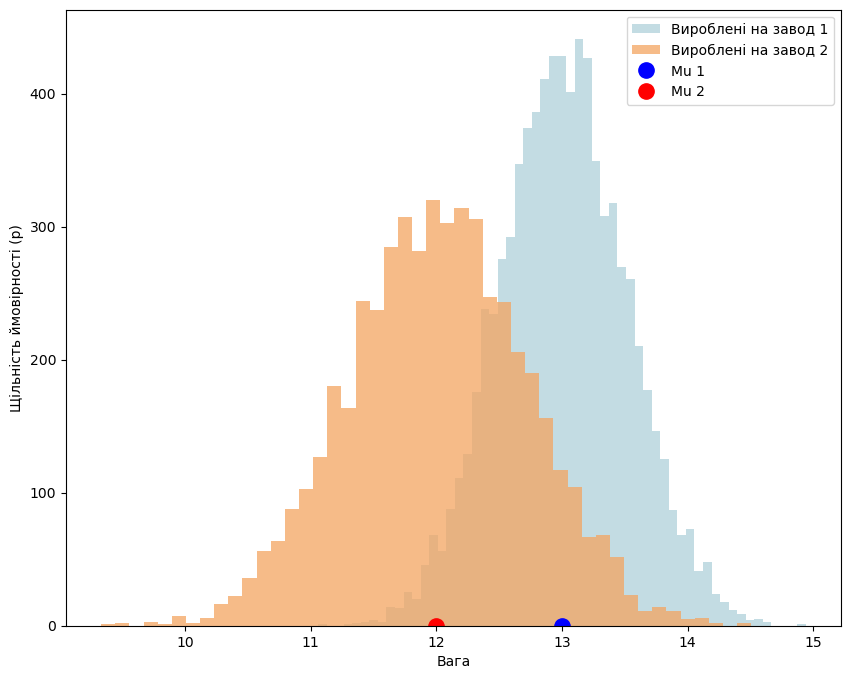

In [45]:
X = np.zeros((N))
np.random.seed(seed=31)
X[:N1] = np.random.normal(loc=mu_1, scale=sigma_1, size=N1)
X[N1:N] = np.random.normal(loc=mu_2, scale=sigma_2, size=N2)

y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

w1 = float(N1)/N
w2 = float(N2)/N

proba_X = []
proba_X = proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2)

limit_proba = 0.5

pred_X = []
pred_X = pred_x(proba_X, limit_proba)

print ('Доля вірно визначених виробів:', round(accuracy_score(y, pred_X),3), '\n')

graph(X, pred_X, mu_1, sigma_1, mu_2, sigma_2)